In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Welche Module?

Statistik ist ein sehr breites Feld. Daher gibt es nicht das eine Modul, für alle statistischen Bereiche und Anwendungen. Hier daher ein kurzer Überblick, welche Python Module es für welche Zwecke gibt.

- [SciPy](https://scipy.org/): Erste Anlaufstelle für einfachere Dinge: Wahrscheinlichkeitsfunktionen; Deskriptive, zusammenfassende Statistiken; einfache statistische Tests; 
- [Statsmodels](https://www.statsmodels.org/stable/index.html): erweiterte statistische Modelle und Tests
- [Pingouin](https://pingouin-stats.org/build/html/index.html): statistische Tests einfacher zu handhaben und mit mehr Output
- [SciKit-Learn](https://scikit-learn.org/stable/): Klassifikation, Regression, Clustering, Modell Selektion
- [PyMC](https://www.pymc.io/projects/docs/en/stable/learn.html): Bayesianische Statistik und Modellierung; probabilistisches Maschinelles Lernen

# Distributionen

SciPy weist eine enorme Bandbreite an [Wahrscheinlichkeitsverteilungen](https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions) auf.

**Beispiel:**

Alle 12 Minuten kommt ein Bus. Was ist die Wahrscheinlichkeit, 7 Minuten oder weniger zu warten?

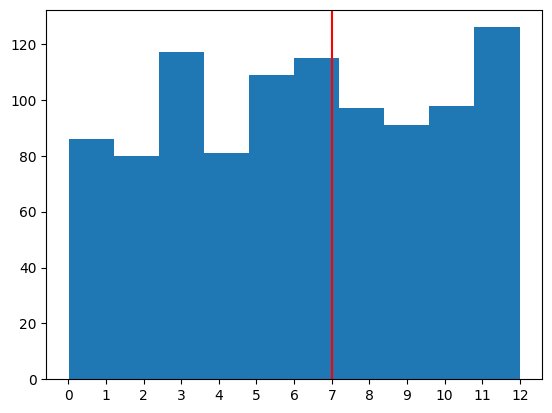

In [138]:
# Wie sieht die Verteilung aus?

r = stats.uniform.rvs(loc=0, scale=12, size=1000)

_, ax = plt.subplots()
ax.hist(r)
ax.set_xticks(range(13))
plt.axvline(7, color="r")
plt.show()

In [133]:
# uniform distribution

from scipy.stats import uniform

uniform.cdf(7, loc=0, scale=12)

0.5833333333333334

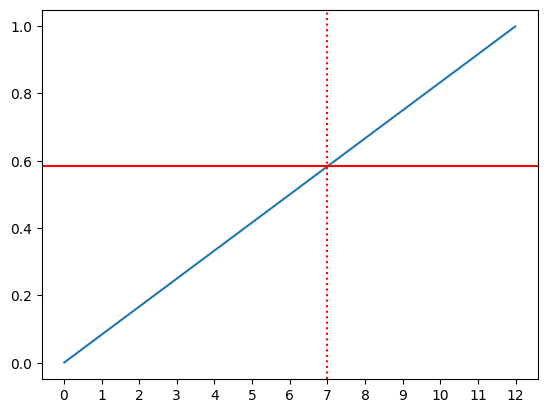

In [142]:
x = np.linspace(r.min(), r.max(), 1000)

_, ax = plt.subplots()
ax.plot(x, uniform.cdf(x, loc=0, scale=12))
plt.axvline(7, color="r", linestyle="dotted")
plt.axhline(uniform.cdf(7, 0, 12), color="r")
ax.set_xticks(range(13))

plt.show()

Was ist die Wahrscheinlichkeit, länger als 7 Minuten zu warten?

In [3]:
1 - uniform.cdf(7, 0, 12)

0.41666666666666663

Und die Wahrscheinlichkeit, zwischen 4 und 7 Minuten zu warten?

In [4]:
uniform.cdf(7, 0, 12) - uniform.cdf(4, 0, 12)

0.25000000000000006

# Korrelationen

In [12]:
reslz_df = pd.read_csv("data/resilienz.csv", sep=";", decimal=",")

In [13]:
reslz_df = reslz_df.iloc[:, 1:]

In [14]:
reslz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bildungsabschluss  550 non-null    object 
 1   resilienz          550 non-null    float64
 2   sportverein        550 non-null    int64  
 3   stundenbewegung    550 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 17.3+ KB


In [17]:
reslz_df.head()

,bildungsabschluss,resilienz,sportverein,stundenbewegung
0,d) Gymnasium,0.084340,1,5
1,d) Gymnasium,-2.431638,1,1
2,d) Gymnasium,0.812406,1,3
3,d) Gymnasium,0.587592,0,0
4,d) Gymnasium,-1.966560,1,3


### normalverteilt?

In [48]:
bew = reslz_df["stundenbewegung"]
res = reslz_df["resilienz"]

In [49]:
print(len(bew))
print(len(res))

550
550


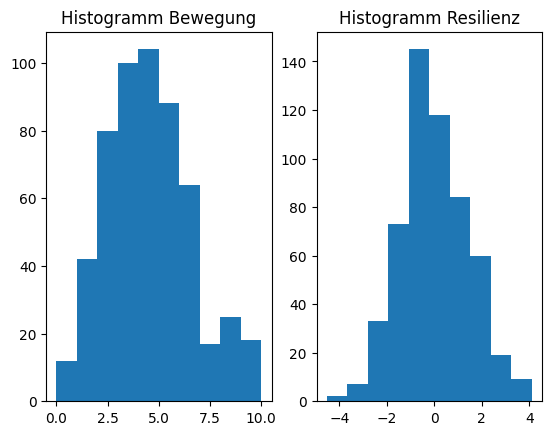

In [33]:
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(bew)
ax2.hist(res)

ax1.set_title("Histogramm Bewegung")
ax2.set_title("Histogramm Resilienz")

plt.show()

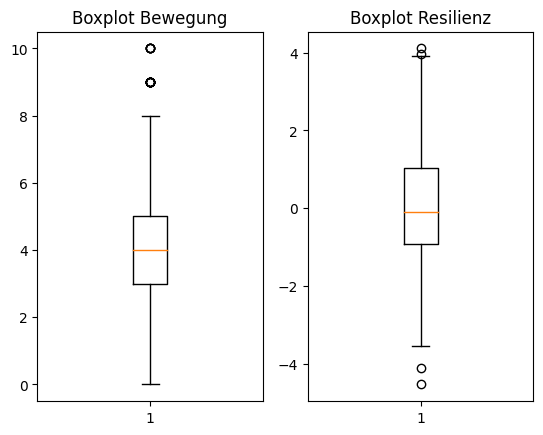

In [34]:
_, (ax1, ax2) = plt.subplots(1, 2)

ax1.boxplot(bew)
ax2.boxplot(res)

ax1.set_title("Boxplot Bewegung")
ax2.set_title("Boxplot Resilienz")

plt.show()

In [76]:
# Kolmogorov-Smirfnov Test

stat, p = stats.kstest(bew, "norm")
print(f"Bewegung  - Statistik: {stat}, P: {p}")

stat, p = stats.kstest(res, "norm")
print(f"Resilienz - Statistik: {stat}, P: {p}")

Bewegung  - Statistik: 0.8790680498700026, P: 0.0
Resilienz - Statistik: 0.09997260064690139, P: 3.080748230523634e-05


In [78]:
# Shapiro-Wilk Test

stat, p = stats.shapiro(bew)
print(f"Bewegung  - Statistik: {stat}, P: {p}")

stat, p = stats.shapiro(res)
print(f"Resilienz - Statistik: {stat}, P: {p}")

Bewegung  - Statistik: 0.9610379934310913, P: 6.845372879649148e-11
Resilienz - Statistik: 0.9969815611839294, P: 0.4034714996814728


## Korrelationen plotten

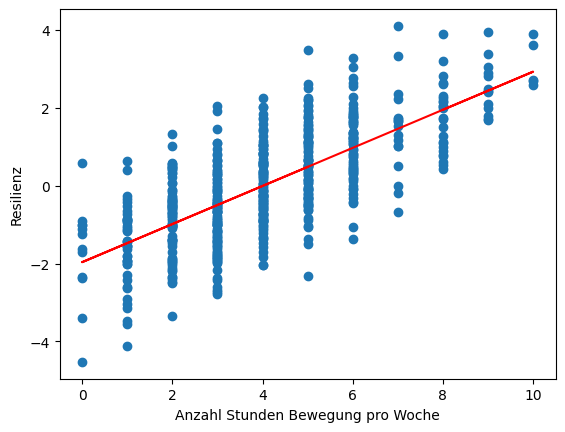

In [30]:
_, ax = plt.subplots()

ax.scatter(bew, res)

slope, intercept = np.polyfit(bew, res, 1) # I really don't know what the hell is going on here!!
ax.plot(bew, bew*slope+intercept, color="red")

ax.set_xlabel("Anzahl Stunden Bewegung pro Woche")
ax.set_ylabel("Resilienz")

plt.show()

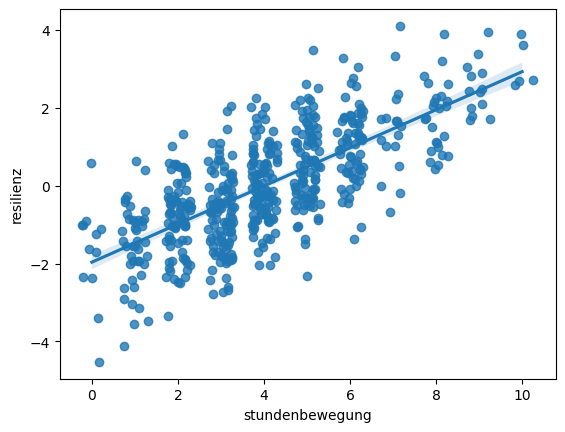

In [69]:
import seaborn as sns

sns.regplot(x=bew, y=res, x_jitter=0.3)
plt.show()

## verschiedene Korrelationskoeffizienten

In [35]:
bew.corr(res)

0.7162046913400608

In [59]:
result = stats.pearsonr(bew, res)
print(f"Koeff (Pearson): {result.statistic}, P: {result.pvalue}")

ci = result.confidence_interval(confidence_level=.95)
print(f"Konfidenzintervall zwischen {ci.low} und {ci.high}")

Koeff (Pearson): 0.716204691340061, P: 1.1801174971538847e-87
Konfidenzintervall zwischen 0.6728905096721732 und 0.7546246888551433


In [61]:
spear_corr, spear_p = stats.spearmanr(bew, res)
print(f"Koeff (Spearman): {spear_corr}, P: {spear_p}")

Koeff (Spearman): 0.7032192442866754, P: 3.162142463981536e-83


In [62]:
ken_corr, ken_p = stats.kendalltau(bew, res)
print(f"Koeff (Kendall): {ken_corr}, P: {ken_p}")

Koeff (Kendall): 0.5401725034867534, P: 8.143845857320777e-71


# Signfikanztest

In [81]:
kurse_df = pd.read_csv("data/stud_zufriedenheit.csv", sep=";", decimal=",", doublequote='"')

In [84]:
kurse_df = kurse_df.astype({"kurs": "category",
                            "geschlecht": "category", 
                            "kinder": "category",
                            "nebenjob": "category",
                            "studienberatung": "category",
                            "unisport": "category",
                            "party": "category"})

In [87]:
kurse_df.shape

(188, 15)

In [85]:
kurse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   code             188 non-null    int64   
 1   kurs             188 non-null    category
 2   geschlecht       188 non-null    category
 3   alter            188 non-null    int64   
 4   kinder           188 non-null    category
 5   nebenjob         188 non-null    category
 6   studienberatung  188 non-null    category
 7   unisport         188 non-null    category
 8   party            188 non-null    category
 9   stud.zufr.1      188 non-null    int64   
 10  stud.zufr.2      188 non-null    int64   
 11  stud.zufr.3      188 non-null    int64   
 12  leb.zufr         188 non-null    int64   
 13  gewiss           188 non-null    float64 
 14  prok             188 non-null    float64 
dtypes: category(7), float64(2), int64(6)
memory usage: 14.1 KB


In [86]:
kurse_df.head()

,code,kurs,geschlecht,alter,kinder,nebenjob,studienberatung,unisport,party,stud.zufr.1,stud.zufr.2,stud.zufr.3,leb.zufr,gewiss,prok
0,1,2,1,38,1,0,1,0,0,4,5,2,5,3.50,3.0
1,2,3,0,41,1,1,1,0,1,4,6,3,7,4.00,2.5
2,3,2,1,19,0,1,0,0,0,4,5,1,6,2.75,3.1
3,4,2,0,32,0,0,0,0,1,3,4,2,6,3.00,3.6
4,5,4,0,39,1,0,0,0,1,2,5,2,4,4.50,2.3


**Wie viele Kurse gibt es?**

In [88]:
kurse_df.kurs.dtype.categories

Int64Index([1, 2, 3, 4], dtype='int64')

**Erstellen Sie je Kurs einen Boxplot der AV "Prokrastination".**

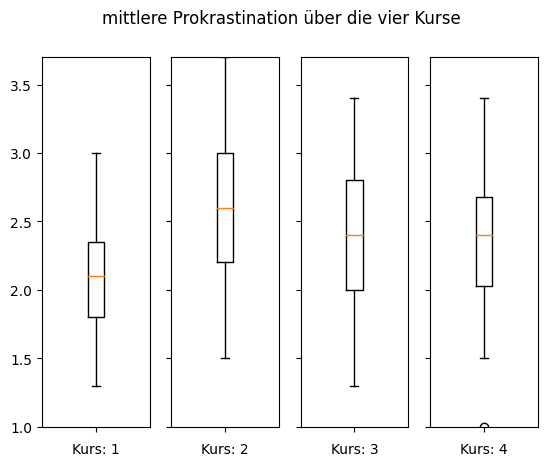

In [98]:
fig, axs = plt.subplots(1, 4)

for c in kurse_df.kurs.dtype.categories:
    axs[c-1].boxplot(kurse_df[kurse_df.kurs == c].prok)
    axs[c-1].set_xlabel(f"Kurs: {c}")
    axs[c-1].set(xticklabels=[])
    if c-1 > 0:
        axs[c-1].set(yticklabels=[])
    
for ax in axs:
    ax.set_ylim(kurse_df.prok.min(), kurse_df.prok.max())
    
fig.suptitle("mittlere Prokrastination über die vier Kurse")
    
plt.show()

## T-Test

**Unterscheiden sich Studierende mit und ohne Kinder bezüglich ihrer mittleren Gewissenhaftigkeit?**

In [99]:
mit_Kinder = kurse_df[kurse_df["kinder"] == 1]["gewiss"]

ohne_Kinder = kurse_df[kurse_df["kinder"] == 0]["gewiss"]

print(mit_Kinder.shape, ohne_Kinder.shape)

(32,) (156,)


**Prüfung der Voraussetzungen**

- normalverteilt?
- ähnliche Varianz?

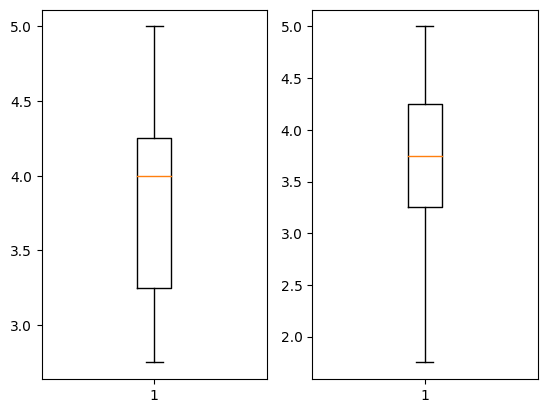

In [103]:
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(mit_Kinder)
ax2.boxplot(ohne_Kinder)
plt.show()

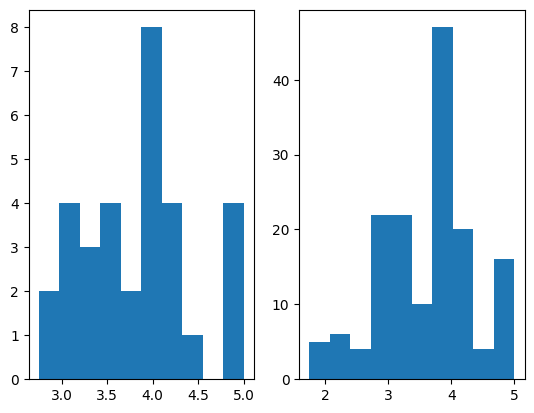

In [102]:
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(mit_Kinder)
ax2.hist(ohne_Kinder)
plt.show()

In [100]:
print(stats.shapiro(mit_Kinder))
print(stats.shapiro(ohne_Kinder))

ShapiroResult(statistic=0.9399418830871582, pvalue=0.074583038687706)
ShapiroResult(statistic=0.9722573757171631, pvalue=0.0030853780917823315)


**Heteroskedastizität?**

Für einen White's Test müssen wir das Modul "Statsmodels" importieren. Nur dieses hat die nötigen Werkzeuge. Es ist aber in seiner Benutzung aber nicht intuitiv und man muss gut in der Dokumentation nachlesen.

In [108]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

In [107]:
y = kurse_df.gewiss

x = kurse_df.kinder

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

In [112]:
white_test = het_white(model.resid, model.model.exog)

labels = ['Statistik', 'P-Wert', 'F-Statistik', 'F-Test P-Wert']

statistics = dict(zip(labels, white_test))

for key in statistics.keys():
    print(f"{key}: {stats[key]}")

Statistik: 0.9110251473920128
P-Wert: 0.33984256320635436
F-Statistik: 0.9057224112132244
F-Test P-Wert: 0.34248699213014


Wir können die Nullhypothese, dass Homoskedastizität besteht nicht verwerfen!

**Wir machen also nun einen T-Test.**

Zuerst einen unabhängigen und dann doch einen Welch korrigierten.

In [116]:
ttest_ind = stats.ttest_ind(mit_Kinder, ohne_Kinder)

print(f"T-Stat: {ttest_ind.statistic} | P-Wert: {ttest_ind.pvalue}")

T-Stat: 1.3299478685388841 | P-Wert: 0.18516400216895487


In [117]:
ttest_welch = stats.ttest_ind(mit_Kinder, ohne_Kinder, equal_var=False) # equal variance set to false!

print(f"T-Stat: {ttest_welch.statistic} | P-Wert: {ttest_welch.pvalue}")

T-Stat: 1.436134828883306 | P-Wert: 0.1573868659839124


**Wir können das Ganze auch noch mit Pingouin machen, um schöneren Output zu bekommen.**

In [119]:
import pingouin as pg

In [120]:
ttest_df = pg.ttest(mit_Kinder, ohne_Kinder)

ttest_df

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.436135,48.471446,two-sided,0.157387,"[-0.07, 0.45]",0.258093,0.514,0.262615


## ANOVA

**Unterscheiden sich die vier Kurse hinsichtlich ihrer mittleren Prokrastination?**

In [131]:
kurse_df.groupby(["kurs"])["prok"].agg(["mean", "std"])

,mean,std
kurs,,
1,2.108511,0.447131
2,2.587273,0.556129
3,2.395000,0.515876
4,2.386957,0.521795


Zuerst wenden wir die ANOVA Funktionen von SciPy an.

In [121]:
kurs_1 = kurse_df[kurse_df.kurs == 1]["prok"]
kurs_2 = kurse_df[kurse_df.kurs == 2]["prok"]
kurs_3 = kurse_df[kurse_df.kurs == 3]["prok"]
kurs_4 = kurse_df[kurse_df.kurs == 4]["prok"]

In [127]:
anova_scipy = stats.f_oneway(kurs_1, kurs_2, kurs_3, kurs_4)

print(f"F: {anova_scipy.statistic} | P: {anova_scipy.pvalue}")

F: 7.377499782671549 | P: 0.00010754170196025229


**Das ist allerdings ein bisschen "mager" was hierbei ausgegeben wird. Lediglich zwei Werte!**

Mehr bekommen wir mit *Statsmodel*.

In [130]:
from statsmodels.formula.api import ols

model = ols('prok ~ C(kurs)', data=kurse_df).fit()

sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(kurs),3.0,5.837310,1.945770,7.3775,0.000108
Residual,184.0,48.528861,0.263744,NaN,NaN


Wie gesagt, die Verwendung von *Statsmodels* ist nicht intuitiv und viele Funktionen sind in den verschiedensten Submodulen geordnet.

**Noch einfach funktioniert ein ordentlicher Output mit *Pingouin*.**

In [132]:
anova_ping = pg.anova(data=kurse_df, dv="prok", between="kurs")

anova_ping

,Source,ddof1,ddof2,F,p-unc,np2
0,kurs,3,184,7.3775,0.000108,0.10737


**Hat die länge des Semesters Einfluss auf die Studienzufriedenheit? Unterscheidet sich die Studienzufriedenheit aller Studierender an den drei Messzeitpunkten?**

In [146]:
tmp_df = kurse_df[['code', 'stud.zufr.1', 'stud.zufr.2', 'stud.zufr.3']]

melted_df = tmp_df.melt(id_vars=['code'], var_name='messzpkt', value_name='zufriedenheit')

melted_df.head()

,code,messzpkt,zufriedenheit
0,1,stud.zufr.1,4
1,2,stud.zufr.1,4
2,3,stud.zufr.1,4
3,4,stud.zufr.1,3
4,5,stud.zufr.1,2


In [150]:
from statsmodels.stats.anova import AnovaRM

print(AnovaRM(data=melted_df, depvar='zufriedenheit', subject='code', within=['messzpkt']).fit())

                 Anova
         F Value  Num DF  Den DF  Pr > F
----------------------------------------
messzpkt 302.8952 2.0000 374.0000 0.0000



In [152]:
pg.rm_anova(data=melted_df, dv='zufriedenheit', subject='code', within='messzpkt')

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,messzpkt,2,374,302.895226,6.096500e-79,1.906812e-76,0.514149,0.967125,False,0.966008,0.040105


# Lineare Regression